In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_anime=pd.read_csv('anime.csv')
df_rate=pd.read_csv('rating.csv')

In [ ]:
df_anime.head()

In [ ]:
df_anime.tail()

In [6]:
df_anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
df_anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [8]:
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
df_anime.dropna(subset=['rating','genre','type'],inplace=True)

In [10]:
df_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
df_anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [12]:
df_anime=df_anime[df_anime["episodes"]!='Unknown']

In [13]:
df_anime['episodes']=df_anime['episodes'].astype('int64')

In [14]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [15]:
df_anime.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

# Exploring Movies of Anime

In [16]:
df_movies=df_anime[df_anime["type"]=='Movie']

In [17]:
df_movies.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193


In [18]:
df_movies.sort_values(['members','rating'],ascending=False)

,anime_id,name,genre,type,episodes,rating,members
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186
411,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3,8.10,324035
132,2236,Toki wo Kakeru Shoujo,"Adventure, Drama, Romance, Sci-Fi",Movie,1,8.44,289206
115,523,Tonari no Totoro,"Adventure, Comedy, Supernatural",Movie,1,8.48,271484
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193
225,5681,Summer Wars,"Comedy, Sci-Fi",Movie,1,8.30,223359
191,43,Ghost in the Shell,"Action, Mecha, Police, Psychological, Sci-Fi, ...",Movie,1,8.34,223036


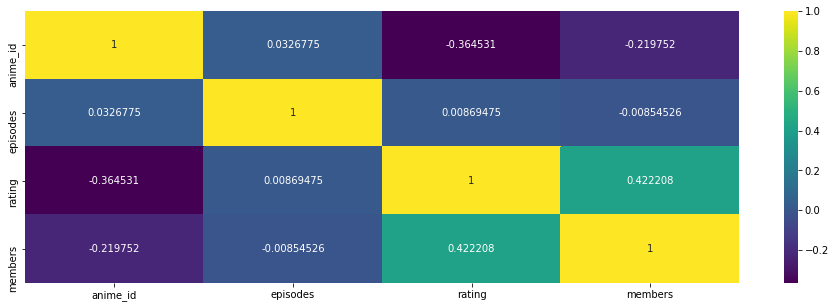

In [19]:
plt.figure(figsize = (16,5))
df_check=df_movies.corr()
sns.heatmap(df_check, annot=True, fmt="g", cmap='viridis')
plt.show()

In [20]:
del df_movies['episodes']

In [21]:
del df_movies['type']

In [22]:
df_movies

,anime_id,name,genre,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",8.84,226193
24,164,Mononoke Hime,"Action, Adventure, Fantasy",8.81,339556
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",8.81,240297
33,28957,Mushishi Zoku Shou: Suzu no Shizuku,"Adventure, Fantasy, Historical, Mystery, Seine...",8.75,32266
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",8.74,333186
37,31757,Kizumonogatari II: Nekketsu-hen,"Action, Mystery, Supernatural, Vampire",8.73,34347


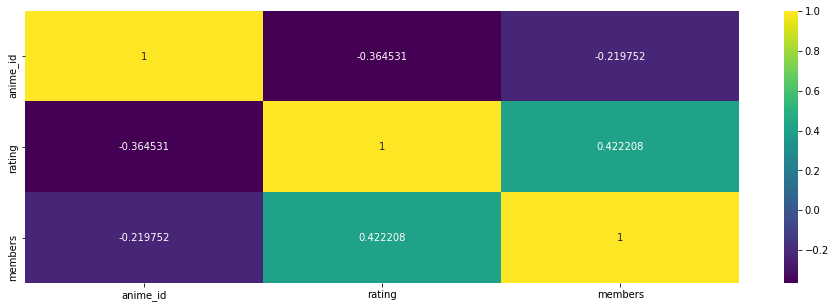

In [23]:
plt.figure(figsize = (16,5))
df_check=df_movies.corr()
sns.heatmap(df_check, annot=True, fmt="g", cmap='viridis')
plt.show()

In [24]:
print(df_movies['members'].mean())
print(df_movies['rating'].mean())

10568.609831709477
6.3344862710363055


In [25]:
def f(row):
    val=0
    if row['rating']>=9.5:
        val=1
    elif row['rating']>=9:
        val=2
    elif row['rating']>=8.5:
        val=3
    elif row['rating']>=8:
        val=4
    elif row['rating']>=7.5:
        val=5
    elif row['rating']>=7:
        val=6
    elif row['rating']>=6.5:
        val=7
    return val

df_movies['hexcode'] = df_movies.apply(f, axis=1)

C:\New folder\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
df_movies.head()

,anime_id,name,genre,rating,members,hexcode
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,2
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",9.10,72534,2
11,28851,Koe no Katachi,"Drama, School, Shounen",9.05,102733,2
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",8.93,466254,3
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",8.84,226193,3


In [27]:
df_considerable_movies=df_movies[(df_movies['members']>df_movies['members'].mean()) & (df_movies['rating']>df_movies['rating'].mean())]
df_considerable_movies.head()

,anime_id,name,genre,rating,members,hexcode
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,2
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",9.10,72534,2
11,28851,Koe no Katachi,"Drama, School, Shounen",9.05,102733,2
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",8.93,466254,3
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",8.84,226193,3


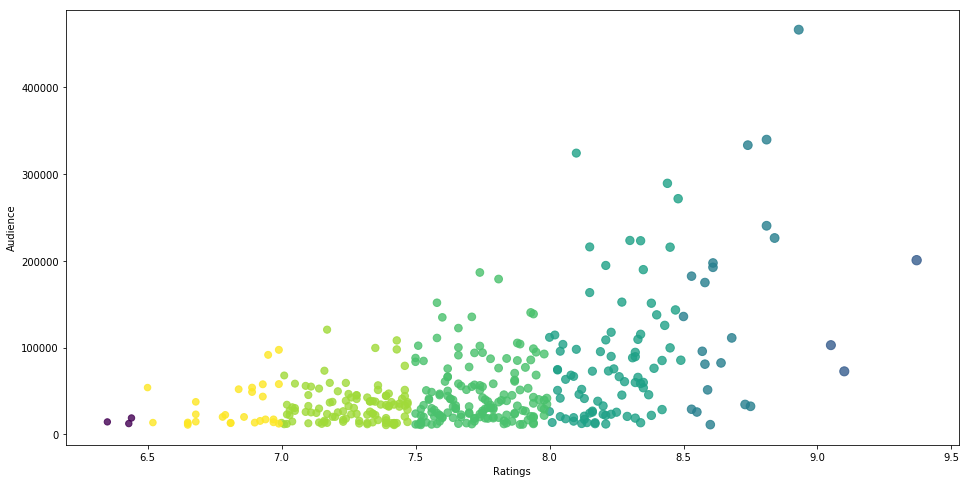

In [28]:
colordict={1:'#30E6B1',2:'#A1F5AD',3:'#E4B06E',4:'#EA4052',5:'#42C6CF',6:'#C6D359',7:'#45B39C'}
plt.figure(figsize=(16, 8))
plt.scatter(df_considerable_movies['rating'],df_considerable_movies['members'],s=df_considerable_movies['rating']**2,alpha=0.8,c=df_considerable_movies['hexcode'])
plt.xlabel('Ratings')
plt.ylabel('Audience')
plt.show()

C:\New folder\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


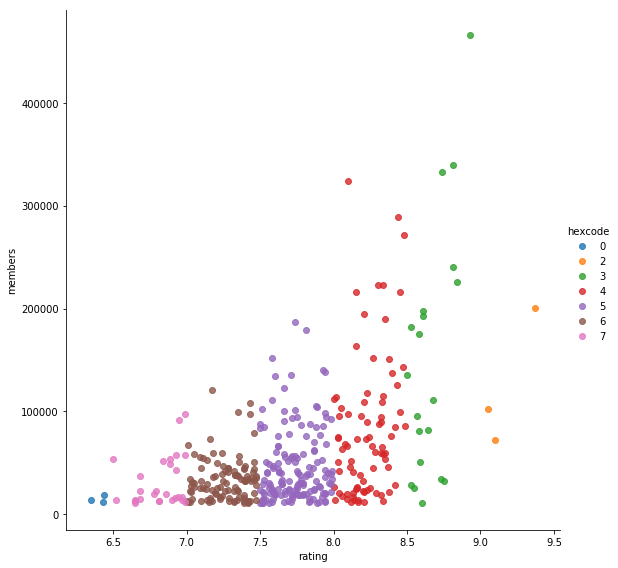

In [29]:
plt.figure(figsize=(20, 8))
sns.lmplot('rating','members', data=df_considerable_movies, hue='hexcode',fit_reg=False,size=8)
plt.show()

In [30]:
df_movies_rec=pd.merge(df_movies,df_rate,on='anime_id')

In [31]:
df_rate.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [32]:
mainmean=df_movies_rec['rating_x'].mean()
print(mainmean)

7.809518266304029


In [33]:
df_movies_rec.head()

,anime_id,name,genre,rating_x,members,hexcode,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,2,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,2,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,2,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,2,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,2,278,-1


In [34]:
df_movies_rec.describe()

,anime_id,rating_x,members,hexcode,user_id,rating_y
count,1.051909e+06,1.051909e+06,1.051909e+06,1.051909e+06,1.051909e+06,1.051909e+06
mean,5.089078e+03,7.809518e+00,1.065021e+05,4.722293e+00,3.698063e+04,6.142736e+00
std,6.353816e+03,6.210914e-01,9.936423e+04,1.299121e+00,2.092286e+04,3.823369e+00
min,5.000000e+00,1.920000e+00,4.000000e+01,0.000000e+00,1.000000e+00,-1.000000e+00
25%,5.720000e+02,7.420000e+00,3.737900e+04,4.000000e+00,1.931000e+04,5.000000e+00
50%,2.236000e+03,7.790000e+00,7.628600e+04,5.000000e+00,3.785300e+04,8.000000e+00
75%,7.711000e+03,8.300000e+00,1.402770e+05,6.000000e+00,5.481800e+04,9.000000e+00
max,3.413600e+04,9.500000e+00,4.662540e+05,7.000000e+00,7.351500e+04,1.000000e+01


In [35]:
df_movies_rec.dtypes
df_movies_rec['rating_x']=df_movies_rec['rating_x'].astype('float64')
df_movies_rec['rating_y']=df_movies_rec['rating_y'].astype('float64')

In [36]:
df_movies_rec.name.unique()
print(len(df_movies_rec))

1051909


In [37]:
count_node=pd.DataFrame(df_movies_rec.groupby('name')['rating_y'].mean())
count_node['num of ratings'] = pd.DataFrame(df_movies_rec.groupby('name')['rating_y'].count())

In [38]:
count_node.sort_values(['rating_y'],ascending=False)
count_node.head()

,rating_y,num of ratings
name,,
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535
.hack//G.U. Trilogy,5.347943,1118
.hack//The Movie: Sekai no Mukou ni,5.147982,446
009 Re:Cyborg,5.305842,291


In [39]:
count_node.reset_index(inplace=True)

In [40]:
count_node.head()

,name,rating_y,num of ratings
0,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000,2
1,&quot;Bungaku Shoujo&quot; Movie,6.457980,1535
2,.hack//G.U. Trilogy,5.347943,1118
3,.hack//The Movie: Sekai no Mukou ni,5.147982,446
4,009 Re:Cyborg,5.305842,291


In [41]:
count_node.describe()

,rating_y,num of ratings
count,2112.000000,2112.000000
mean,3.537229,498.062973
std,2.578522,1516.235904
min,-1.000000,1.000000
25%,2.000000,2.000000
50%,4.350000,14.000000
75%,5.535555,156.500000
max,10.000000,22974.000000


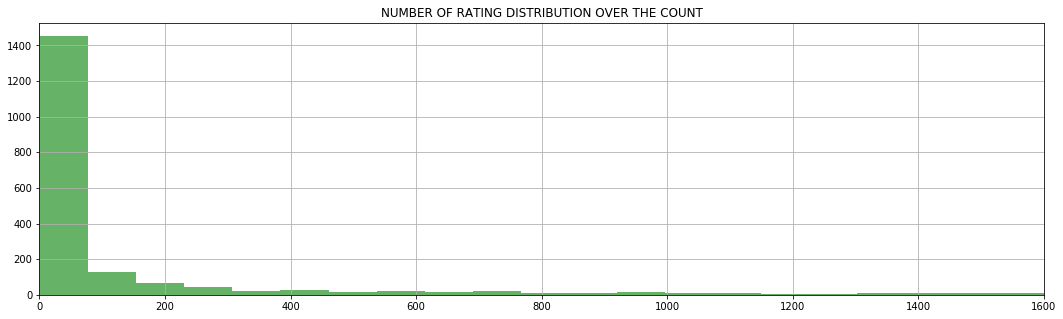

In [42]:
plt.figure(figsize=(18,5))
count_node['num of ratings'].hist(bins=300,color='g',alpha=0.6)
plt.title('NUMBER OF RATING DISTRIBUTION OVER THE COUNT')
plt.xlim(0,1600)
plt.show()

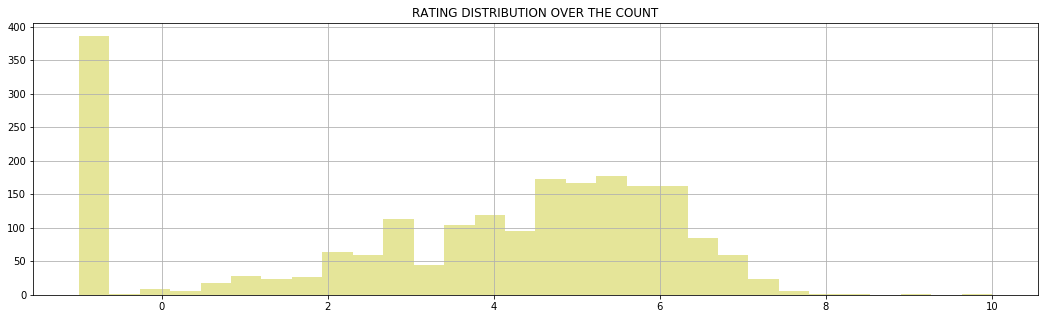

In [43]:
plt.figure(figsize=(18,5))
count_node['rating_y'].hist(bins=30,color='y',alpha=0.4)
plt.title('RATING DISTRIBUTION OVER THE COUNT')
plt.show()

In [44]:
genre_sets=set()
for i in df_movies['genre']:
    k=i.split(',')
    for i in k:
        genre_sets.add(str(i))

C:\New folder\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


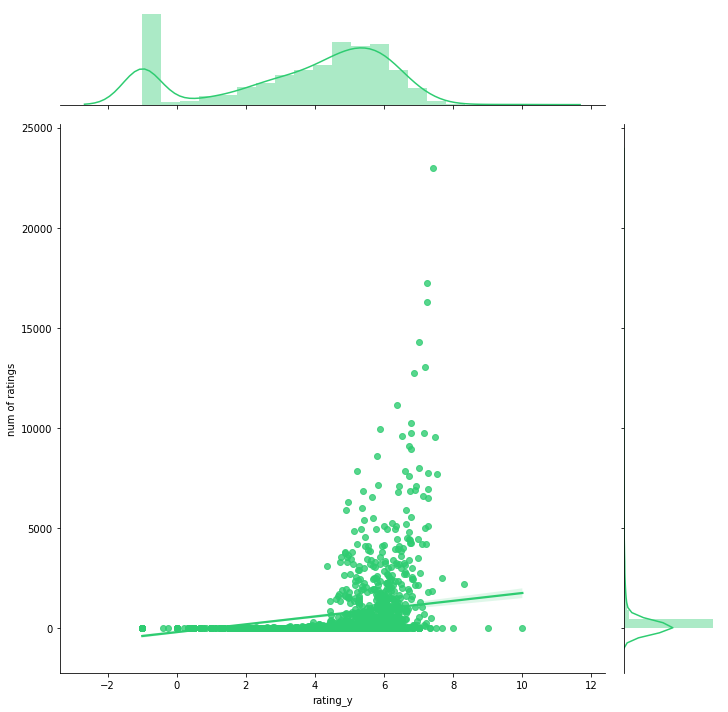

In [45]:
plt.figure(figsize=(20,5))
sns.jointplot(x='rating_y',y='num of ratings',data=count_node,color='#2ecc71',size=10,kind='reg')
plt.show()

In [46]:
df_genre_mov =pd.DataFrame(df_movies[['name','genre']])

In [47]:
df_genre_mov.reset_index(inplace=True)
df_genre_mov.head()

,index,name,genre
0,0,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S..."
2,11,Koe no Katachi,"Drama, School, Shounen"
3,15,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural"
4,18,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life"


In [48]:
df_genre_mov.set_index('name',inplace=True)

In [53]:
df_main=pd.merge(df_rate,df_movies,on='anime_id')
df_main.head(1)

,user_id,anime_id,rating_x,name,genre,rating_y,members,hexcode
0,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",7.17,120571,6


In [57]:
#del df_main['anime_id']
#del df_main['rating_x']
#del df_main['genre']
#del df_main['members']
#del df_main['type']
#del df_main['episodes']

In [58]:
df_main.head(1)

,user_id,anime_id,rating_x,name,rating_y,hexcode
0,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,7.17,6


# Generating suggestion on mainmean rating and comparing mean

In [59]:
def rec_mov(name_):
    rating_name_=count_node[count_node['name']==name_]
    #print(rating_name_)
    k_genre_list=df_genre_mov.loc[name_]['genre'].split(',')
    for i in range(len(k_genre_list)):
        k_genre_list[i]=k_genre_list[i].strip()
    df_suggest=df_genre_mov[df_genre_mov.isin(k_genre_list)]
    df_suggest.dropna(subset=['genre'],inplace=True)
    df_suggest.reset_index(inplace=True)
    df_joint=pd.merge(df_suggest,count_node,on='name')
    df_joint['rating_y']=df_joint['rating_y'].astype('float64')
    check=float(rating_name_['rating_y'])
    df_joint_1=df_joint.copy()
    del df_joint_1['genre']
    del rating_name_['name']
    del df_joint_1['index']
   #print(df_joint_1)
    df=df_main.pivot_table(index='user_id',columns='name',values='rating_y')
    similar_df=df.corrwith(df[name_])
    corr_df = pd.DataFrame(similar_df, columns=['Correlation'])
    corr_df.dropna(inplace=True)
    corr_df.reset_index(inplace=True)
    corr_df=corr_df.merge(count_node,on='name')
   #print(corr_df.head(3))
    show_recommendation=corr_df[corr_df['num of ratings'] > 100].sort_values(by=['Correlation','num of ratings'], ascending=False).head(10)
    del show_recommendation['Correlation']
    del show_recommendation['num of ratings']
    del show_recommendation['rating_y']
    return show_recommendation.head(10)
    

In [60]:
def set_pandas_options() -> None:
    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None
    # pd.options.display.precision = 2  # set as needed

set_pandas_options()
rec_mov('Kimi no Na wa.')

C:\New folder\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\New folder\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,name
176,Sen to Chihiro no Kamikakushi
5,Akira
72,Ghost in the Shell
100,Kara no Kyoukai 1: Fukan Fuukei
131,Naruto: Shippuuden Movie 1
150,Paprika
70,Gake no Ue no Ponyo
129,Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo!
85,Higashi no Eden Movie I: The King of Eden
104,Kara no Kyoukai 5: Mujun Rasen


In [61]:
rec_mov('Koe no Katachi')

C:\New folder\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\New folder\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,name
51,Sen to Chihiro no Kamikakushi
4,Bleach Movie 1: Memories of Nobody
37,Majo no Takkyuubin
47,Pokemon: Mewtwo no Gyakushuu
39,Mimi wo Sumaseba
31,Kara no Kyoukai 7: Satsujin Kousatsu (Kou)
6,Blood: The Last Vampire
57,Tokyo Godfathers
2,Berserk: Ougon Jidai-hen I - Haou no Tamago
42,One Piece Movie 4: Dead End no Bouken


In [ ]:
rec_mov('.hack//G.U. Trilogy')

C:\New folder\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\New folder\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,name
153,Howl no Ugoku Shiro
45,Byousoku 5 Centimeter
30,Bleach Movie 1: Memories of Nobody
31,Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru
32,Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu
182,Kotonoha no Niwa
167,Kara no Kyoukai 2: Satsujin Kousatsu (Zen)
220,Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo!
264,Pokemon: Maboroshi no Pokemon Lugia Bakutan
169,Kara no Kyoukai 4: Garan no Dou


In [ ]:
rec_mov('Ookami Kodomo no Ame to Yuki')

C:\New folder\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\New folder\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,name
325,Neon Genesis Evangelion: The End of Evangelion
41,Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru
143,Evangelion: 2.0 You Can (Not) Advance
350,Ookami Kodomo no Ame to Yuki
202,Hotarubi no Mori e
156,Gake no Ue no Ponyo
315,Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!
318,Naruto: Shippuuden Movie 2 - Kizuna
324,Neon Genesis Evangelion: Death &amp; Rebirth
235,Kara no Kyoukai 5: Mujun Rasen
